# Test the ENC-DEC model

In [91]:
import dataloader
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import models
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision
import os
import time
from torch_geometric.nn import GATv2Conv, global_mean_pool
# reload library
import importlib
import cv2
import utils as ut
import pandas as pd
import DataDLC

In [92]:
importlib.reload(dataloader)
importlib.reload(models)

<module 'models' from 'c:\\Users\\Usuario\\Documents\\Documents\\MVA\\Stage\\DLCProject\\Code\\GitHubRep\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\models.py'>

### Load data

---

**This is only to create an eassy graph to test the build_graph_2 function**



In [93]:
if False:
    data_dlc.coords = data_dlc.coords.iloc[range(3), :]
    data_dlc.n_frames = 3
    data_dlc.save(r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTestFormat\output1.h5')


## Load dataset

**Obs:** This is just a test to see if the model is working.

In [165]:
importlib.reload(dataloader)
importlib.reload(DataDLC)

<module 'DataDLC' from 'c:\\Users\\Usuario\\Documents\\Documents\\MVA\\Stage\\DLCProject\\Code\\GitHubRep\\Behavioral_Tagging_of_Mice_in_multiple_Mice_dataset_using_Deep_Learning\\src\\DataDLC.py'>

In [166]:

dataloader.reload_module()

In [167]:
# deactivate warnings

import warnings
warnings.filterwarnings("ignore")


data_loader = dataloader.DLCDataLoader(r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTrainTest', batch_size=1, num_workers=0, device='cpu', window_size=3, stride = 1, build_graph=True)


['DMD_mal_Test_26DLC_CHANGEDD_2_filtered.h5']
Loading data from C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTrainTest, where we have 1 files
Index(['DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000'], dtype='object', name='scorer')
Number of graphs: 8 
 


100%|██████████| 8/8 [00:04<00:00,  1.65it/s]

Graph built in 4.860880374908447 s
Number of files: 1


In [169]:
len(data_loader.dataset[0])

8

In [170]:
torch.save(data_loader.dataset, r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTrainTest\dataset.pt')

In [155]:
data_dlc = DataDLC.DataDLC(r'c:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTrainTest\DMD_mal_Test_26DLC_CHANGEDD_2_filtered.h5')

Index(['DLC_dlcrnetms5_More_BodyPartsJul9shuffle1_740000'], dtype='object', name='scorer')


In [156]:
data_dlc.drop_tail_bodyparts()

In [157]:
data_dlc.coords

individuals individual1                                                   \
bodyparts          Nose                     Left_ear                       
coords                x        y likelihood        x        y likelihood   
0                93.814  158.157        1.0   80.436  191.092        1.0   
1                94.203  158.157        1.0   80.812  191.092        1.0   
2                97.859  158.157        1.0   80.827  191.092        1.0   
3               107.924  143.405        1.0   82.176  170.051        1.0   
4               109.807  115.899        1.0   84.684  142.138        1.0   
5               110.281  104.358        1.0   85.035  125.746        1.0   
6               110.884   89.425        1.0   85.686  111.980        1.0   
7               113.047   89.425        1.0   86.755  110.907        1.0   
8               134.934   89.425        1.0   95.988  105.281        1.0   
9               154.229   99.178        1.0  116.016  104.618        1.0   

individuals                                            ... individual2  \
bodyparts   Right_ear                     Center_head  ...     Spine_2   
coords              x        y likelihood           x  ...  likelihood   
0             109.024  189.598        1.0      92.907  ...         1.0   
1             111.186  189.598        1.0      95.092  ...         1.0   
2             112.489  189.598        1.0      96.330  ...         1.0   
3             113.001  173.214        1.0     101.217  ...         1.0   
4             114.275  145.158        1.0     103.065  ...         1.0   
5             116.703  127.584        1.0     103.085  ...         1.0   
6             117.829  120.825        1.0     103.594  ...         1.0   
7             117.949  120.825        1.0     104.705  ...         1.0   
8             125.133  120.825        1.0     116.722  ...         1.0   
9             141.293  124.229        1.0     137.810  ...         1.0   

individuals                                                                 \
bodyparts   Spine_2-base                     Tail_base                       
coords                 x        y likelihood         x        y likelihood   
0                309.758  301.504        1.0   325.523  301.703        1.0   
1                309.758  302.009        1.0   325.523  305.072        1.0   
2                309.758  302.079        1.0   325.523  305.256        1.0   
3                294.279  305.974        1.0   313.889  305.502        1.0   
4                264.185  307.636        1.0   282.429  309.073        1.0   
5                259.251  310.074        1.0   273.733  310.854        1.0   
6                231.540  323.069        1.0   249.573  330.117        1.0   
7                221.477  323.069        1.0   237.586  330.117        1.0   
8                211.955  323.069        1.0   230.027  330.117        1.0   
9                206.966  319.581        1.0   223.283  322.829        1.0   

individuals                                        
bodyparts   Center of mass                         
coords                   x           y likelihood  
0               240.736235  312.882235   1.000000  
1               240.736235  314.928294   1.000000  
2               240.736235  316.812294   1.000000  
3               226.796706  317.247882   0.999882  
4               200.689059  313.610765   1.000000  
5               188.928471  309.118000   1.000000  
6               171.004765  303.080941   1.000000  
7               160.715118  298.705471   1.000000  
8               152.967000  296.250647   1.000000  
9               146.897294  289.220412   1.000000  

[10 rows x 108 columns]

In [130]:
data_dlc.coords = data_dlc.coords.iloc[range(10)]
data_dlc.n_frames = 10
data_dlc.save(r'c:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTrainTest\DMD_mal_Test_26DLC_CHANGEDD_2_filtered.h5')

In [51]:
a = data_loader.build_graph_3(data_dlc, window_size=3, stride=1)

Number of graphs: 1 
 


100%|██████████| 1/1 [00:01<00:00,  1.20s/it]


In [52]:
# get unique values of a list 
a[2][0].unique().tolist()

[0, 1, 2]

TypeError: 'list' object is not callable

In [273]:
data_loader.dataset
#Plot the graph
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

node_features = node_features_list[0]
edges = edge_index_list[0].T

# edges as tuples
edges = [(edge[0].item(), edge[1].item()) for edge in edges]

G = nx.Graph()
G.add_nodes_from(range(node_features.shape[0]))
G.add_edges_from(edges)


In [274]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

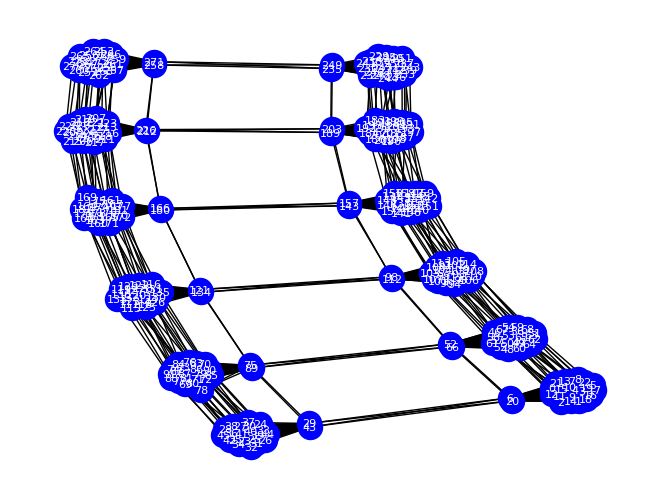

In [275]:
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', with_labels=True, node_size=300, font_size=8, font_color='w')
plt.show()


---

In [116]:
data_dlc = dataloader.DataDLC(r'C:\Users\Usuario\Documents\Documents\MVA\Stage\DLCProject\Data\DataLoaderTestFormat\output1.h5')

In [117]:
data_dlc

23

In [118]:
output = data_loader.build_graph_3(data_dlc, spatial_adj=False, window_size=2, stride = 1)

node_features_list, edge_index_list, frame_mask_list = output

100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


In [119]:
node_features_list

[tensor([[526.0360, 294.3130,   1.0000,   0.0000],
         [480.3750, 337.7330,   1.0000,   0.0000],
         [563.4540, 269.5780,   1.0000,   0.0000],
         [506.9100, 351.0210,   1.0000,   0.0000],
         [530.3590, 338.1720,   1.0000,   0.0000],
         [554.8320, 306.7250,   1.0000,   0.0000],
         [452.0880, 339.1070,   1.0000,   0.0000],
         [501.3400, 260.6910,   1.0000,   0.0000],
         [488.4260, 323.2760,   1.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000],
         [494.8810, 289.5360,   1.0000,   0.0000],
         [514.9320, 321.1100,   1.0000,   0.0000],
         [521.5710, 308.5320,   1.0000,   0.0000],
         [533.7470, 263.0850,   1.0000,   0.0000],
         [537.2160, 247.5770,   1.0000,   0.0000],
         [530.8790, 277.5590,   1.0000,   0.0000],
         [553.3930, 201.2780,   1.0000,   0.0000],
         [557.2620, 167.5970,   1.0000,   0.0000],
         [552.3520, 139.4680,   1.0000,   0.0000],
         [534.1940, 111.3550,  

In [120]:
node_features = node_features_list[0]
edges = edge_index_list[0].T
# edgest as list of tuples
edges = [(edge[0].item(), edge[1].item()) for edge in edges]


In [121]:
edges



[(1, 0),
 (0, 1),
 (2, 0),
 (0, 2),
 (2, 1),
 (1, 2),
 (3, 0),
 (0, 3),
 (3, 1),
 (1, 3),
 (3, 2),
 (2, 3),
 (4, 0),
 (0, 4),
 (4, 1),
 (1, 4),
 (4, 2),
 (2, 4),
 (4, 3),
 (3, 4),
 (5, 0),
 (0, 5),
 (5, 1),
 (1, 5),
 (5, 2),
 (2, 5),
 (5, 3),
 (3, 5),
 (5, 4),
 (4, 5),
 (6, 0),
 (0, 6),
 (6, 1),
 (1, 6),
 (6, 2),
 (2, 6),
 (6, 3),
 (3, 6),
 (6, 4),
 (4, 6),
 (6, 5),
 (5, 6),
 (7, 0),
 (0, 7),
 (7, 1),
 (1, 7),
 (7, 2),
 (2, 7),
 (7, 3),
 (3, 7),
 (7, 4),
 (4, 7),
 (7, 5),
 (5, 7),
 (7, 6),
 (6, 7),
 (8, 0),
 (0, 8),
 (8, 1),
 (1, 8),
 (8, 2),
 (2, 8),
 (8, 3),
 (3, 8),
 (8, 4),
 (4, 8),
 (8, 5),
 (5, 8),
 (8, 6),
 (6, 8),
 (8, 7),
 (7, 8),
 (9, 0),
 (0, 9),
 (9, 1),
 (1, 9),
 (9, 2),
 (2, 9),
 (9, 3),
 (3, 9),
 (9, 4),
 (4, 9),
 (9, 5),
 (5, 9),
 (9, 6),
 (6, 9),
 (9, 7),
 (7, 9),
 (9, 8),
 (8, 9),
 (10, 0),
 (0, 10),
 (10, 1),
 (1, 10),
 (10, 2),
 (2, 10),
 (10, 3),
 (3, 10),
 (10, 4),
 (4, 10),
 (10, 5),
 (5, 10),
 (10, 6),
 (6, 10),
 (10, 7),
 (7, 10),
 (10, 8),
 (8, 10),
 (10, 9),


In [122]:
node_features

tensor([[526.0360, 294.3130,   1.0000,   0.0000],
        [480.3750, 337.7330,   1.0000,   0.0000],
        [563.4540, 269.5780,   1.0000,   0.0000],
        [506.9100, 351.0210,   1.0000,   0.0000],
        [530.3590, 338.1720,   1.0000,   0.0000],
        [554.8320, 306.7250,   1.0000,   0.0000],
        [452.0880, 339.1070,   1.0000,   0.0000],
        [501.3400, 260.6910,   1.0000,   0.0000],
        [488.4260, 323.2760,   1.0000,   0.0000],
        [  0.0000,   0.0000,   0.0000,   0.0000],
        [494.8810, 289.5360,   1.0000,   0.0000],
        [514.9320, 321.1100,   1.0000,   0.0000],
        [521.5710, 308.5320,   1.0000,   0.0000],
        [533.7470, 263.0850,   1.0000,   0.0000],
        [537.2160, 247.5770,   1.0000,   0.0000],
        [530.8790, 277.5590,   1.0000,   0.0000],
        [553.3930, 201.2780,   1.0000,   0.0000],
        [557.2620, 167.5970,   1.0000,   0.0000],
        [552.3520, 139.4680,   1.0000,   0.0000],
        [534.1940, 111.3550,   1.0000,   0.0000],


In [123]:



G = nx.Graph()
G.add_nodes_from(range(node_features.shape[0]))
G.add_edges_from(edges)


In [124]:
G.nodes

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45))

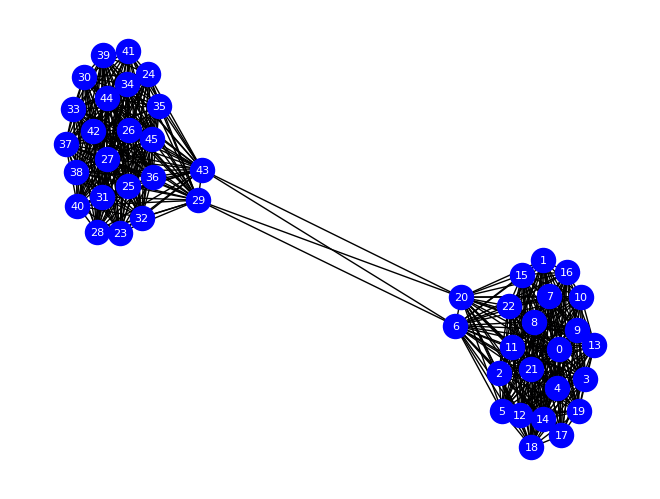

In [125]:

pos = nx.spring_layout(G)
nx.draw(G, pos, node_color='b', with_labels=True, node_size=300, font_size=8, font_color='w')
plt.show()


In [ ]:
# print number of nan values
print(torch.isnan(data_loader.dataset[0].x).sum())

# print number of not nan values
print(torch.isfinite(data_loader.dataset[0].x).sum())

In [ ]:
torch.float64
torch.int64

In [ ]:
importlib.reload(dataloader)
importlib.reload(models)

In [ ]:
graphencoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5)

In [ ]:
embed = graphencoder.forward(data_loader.dataset[0].x, data_loader.dataset[0].edge_index, data_loader.dataset[0].frame_mask)

In [ ]:
embed.shape

In [ ]:
# print number of nan values
print(torch.isnan(embed[0]).sum())

# print number of not nan values
print(torch.isfinite(embed[0]).sum())

### Graph Classifier

In [ ]:
graphencoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5)
class_head = models.ClassificationHead(n_latent = 64, nhid=64, nout=2)

In [ ]:
model = models.GraphClassifier(graphencoder, class_head)

In [ ]:
out = model.forward(data_loader.dataset[0].x, data_loader.dataset[0].edge_index, data_loader.dataset[0].frame_mask)

In [ ]:
print(out.shape)

#### Trainning Loop

In [ ]:
# Trainning loop
epochs = 50
lr = 0.005
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

for epoch in range(epochs):
    model.train()
    for i, data in enumerate(data_loader):
        optimizer.zero_grad()
        x, edge_index, frame_mask, y = data.x, data.edge_index, data.frame_mask, data.y
        out = model.forward(x, edge_index, frame_mask)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch}, Batch {i}, Loss {loss.item()}')

In [ ]:
out = GraphAE.forward(data_loader.dataset[0].x, data_loader.dataset[0].edge_index, data_loader.dataset[0].frame_mask)

In [ ]:
# Loss and optimizer
loss = GraphAE.loss(data_loader.dataset[0].x, out)

In [ ]:
print(loss)

# Trainning loop

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
encoder = models.GATEncoder(nout = 64, nhid=16, attention_hidden=2, n_in=3, dropout=0.5).to(device)
print(encoder)
decoder = models.GATDecoder(n_latent=64, n_hidden=16, n_out=3).to(device)
print(decoder)
model = models.GraphAE(encoder, decoder).to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-3)
data = data_loader.dataset

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    for i in range(len(data)):

        out = model(data[i].x.to(device), data[i].edge_index.to(device), data[i].frame_mask.to(device))
        loss = model.loss(data[i].x, out)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch}, Loss {loss.item()}')

model.eval()
out = model(data[0].x, data[0].edge_index, data[0].frame_mask)

In [ ]:
print(out[0][0].shape)

In [ ]:
numpyout = out[0][0].detach().numpy()

In [ ]:
# Plot the output of the model, the first dimension are the points, and the second one is the x and y coordinates
plt.scatter(numpyout[:,0], numpyout[:,1])


In [ ]:
print(data_loader.dataset[0].x.shape)
print(x[0].shape)
print(x[1].shape)

In [ ]:
print(data_loader.dataset[0].x.shape)
print(x[0].shape)
print(x[1].shape)

In [ ]:
contacts = behaviour.iloc[:,1]

---